In [34]:
pip install squarify

In [35]:
# Import necessary libraries
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import squarify
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

In [36]:
import pandas as pd
# Read data from the CSV using pandas read_csv
df= pd.read_csv('netflix_titles.csv')
#show data
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [37]:
#Check missing Values in each column
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [38]:
#Count of data records in each column
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [39]:
# Unique Values for the type of shows on netflix
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [40]:
# Unique values for the rating
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [47]:
# Which Country produces the most content
n_country = df['country'].dropna()
nc_country = pd.Series(dict(Counter(','.join(n_country).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
#get top 10 countries
nc_country[:10]

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
dtype: int64

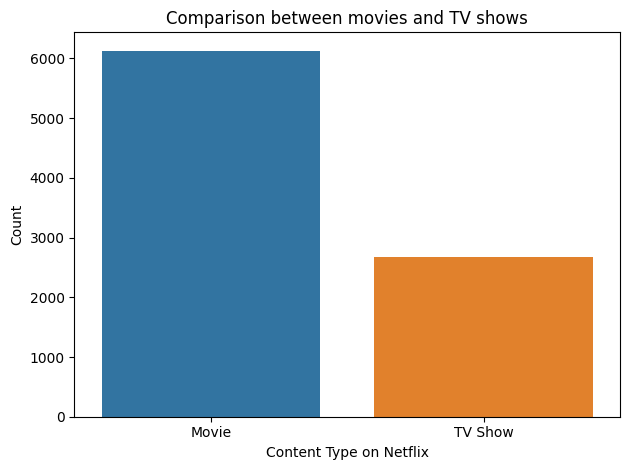

In [41]:
# Comparison between movies and Tv Shows
n_shows = df[df['type']=='TV Show']
n_movies = df[df['type']=='Movie']
# plot
ax=sns.countplot(x='type',data=df)
plt.xlabel("Content Type on Netflix")
plt.ylabel('Count')
plt.title('Comparison between movies and TV shows')
plt.tight_layout()
plt.show()

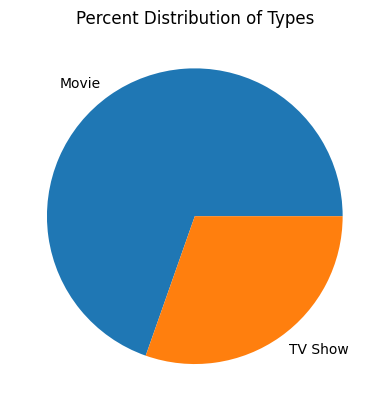

In [42]:
#Percent Distribution
ng_type = df['type'].value_counts().reset_index()
ng_type = ng_type.rename(columns = {'type': 'count','index':'type'})
plt.pie(ng_type['count'], labels=ng_type['type'])
plt.title('Percent Distribution of Types')
plt.show()

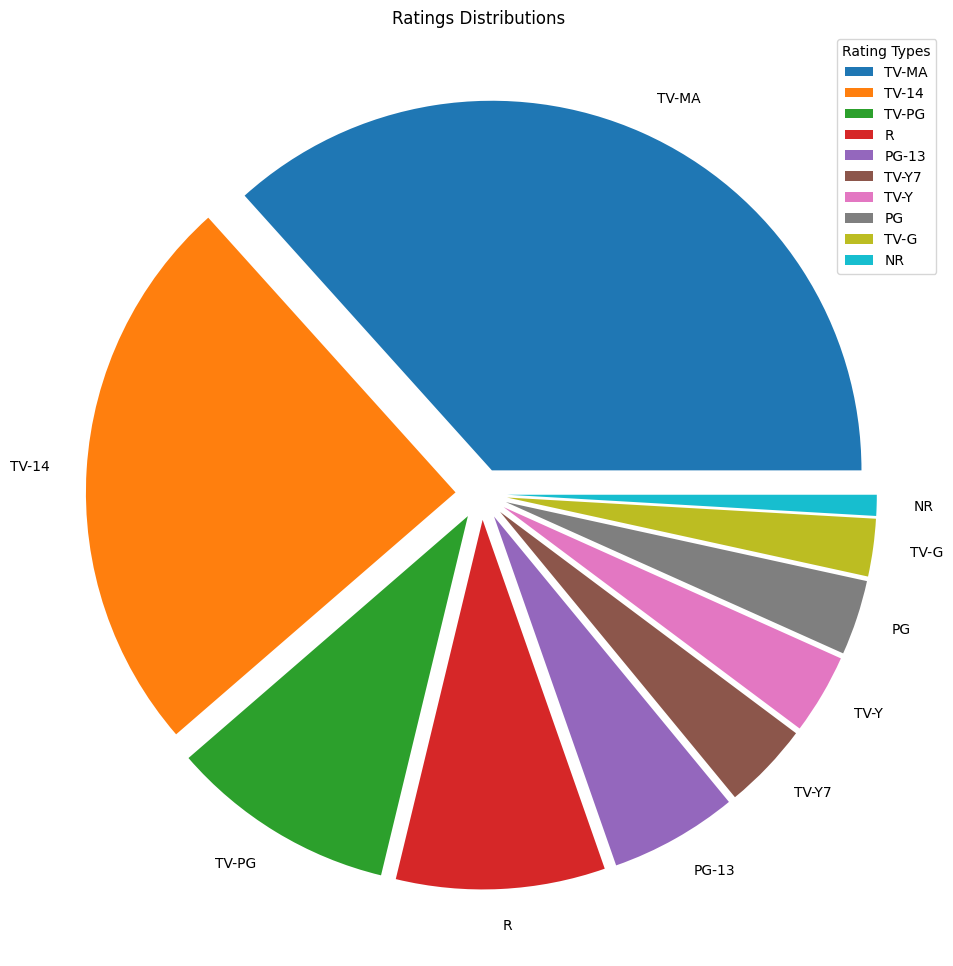

In [61]:
# Distribution of Ratings
plt.figure(figsize=(15,12))
p_ratings = df['rating'].value_counts().head(10)
plt.pie(x=p_ratings,labels=p_ratings.index,explode=[0.07 for i in p_ratings.index])
plt.title('Ratings Distributions ')
plt.legend(title='Rating Types')

plt.show()

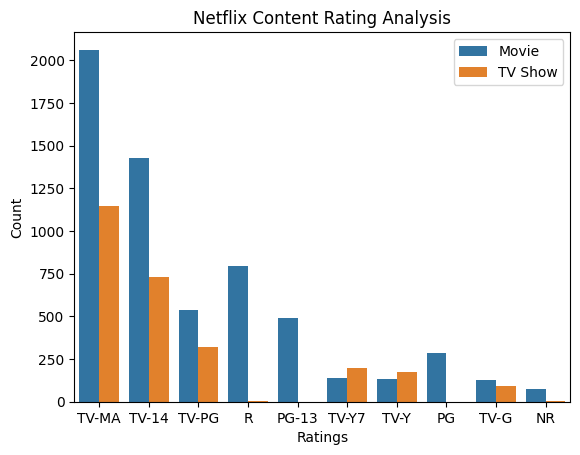

In [44]:
# Ratings Analysis
sns.countplot(x='rating',data=df,hue ='type',order=df['rating'].value_counts().index[0:10])
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.legend()
plt.title('Netflix Content Rating Analysis')

plt.show()

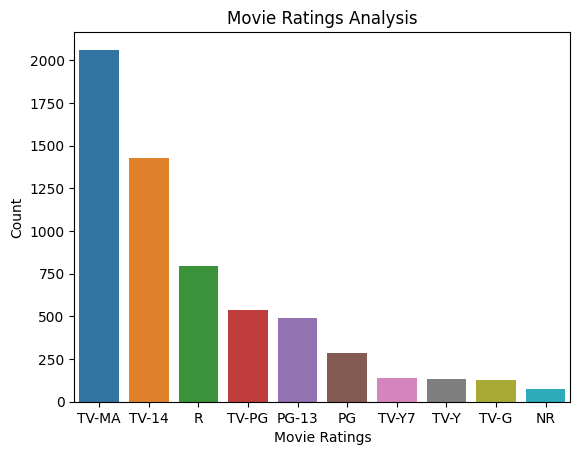

In [45]:
# Movies Ratings Analysis
sns.countplot(x='rating',data=n_movies,order=n_movies['rating'].value_counts().index[0:10])
plt.xlabel('Movie Ratings')
plt.ylabel('Count')
plt.title("Movie Ratings Analysis")

plt.show()

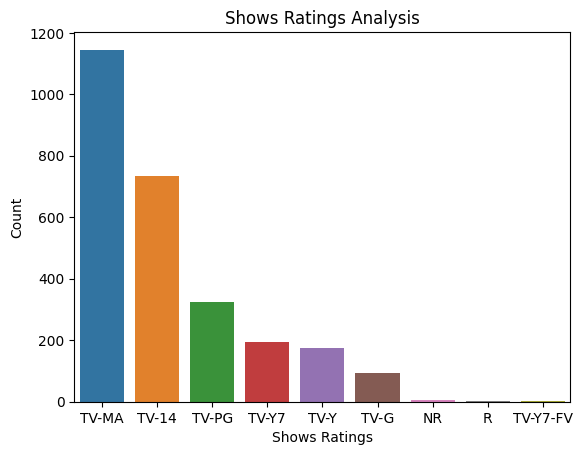

In [46]:
# Show Ratings Analysis
sns.countplot(x='rating',data=n_shows,order=n_shows['rating'].value_counts().index[0:10])
plt.xlabel('Shows Ratings')
plt.ylabel('Count')
plt.title("Shows Ratings Analysis")

plt.show()

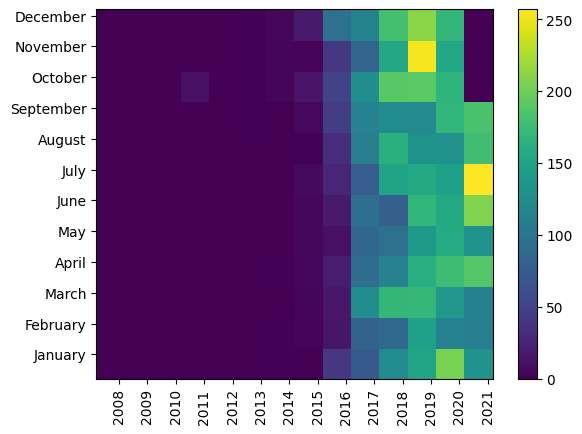

In [56]:
# Month when content was released
n_date=df[['date_added']].dropna()
n_date['year']= n_date['date_added'].apply(lambda x: x.split(', ')[-1])
n_date['month'] = n_date['date_added'].apply(lambda x:x.split(' ')[0])
month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']
g_df= n_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_list].T
# plot
plt.pcolor(g_df,)
plt.xticks(np.arange(0.8,len(g_df.columns),1),g_df.columns)
plt.yticks(np.arange(0.8,len(g_df.index),1),g_df.index)
cbar=plt.colorbar()
plt.xticks(rotation=90)

plt.show()

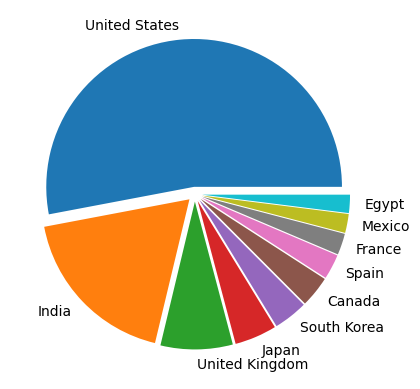

In [63]:
# Top 10 countries
df['country'] = df.country.dropna()
n_countries = df.country.value_counts().head(10)
# plot
plt.pie(x=n_countries,labels=n_countries.index,explode=[0.05 for i in n_countries.index])

plt.show()

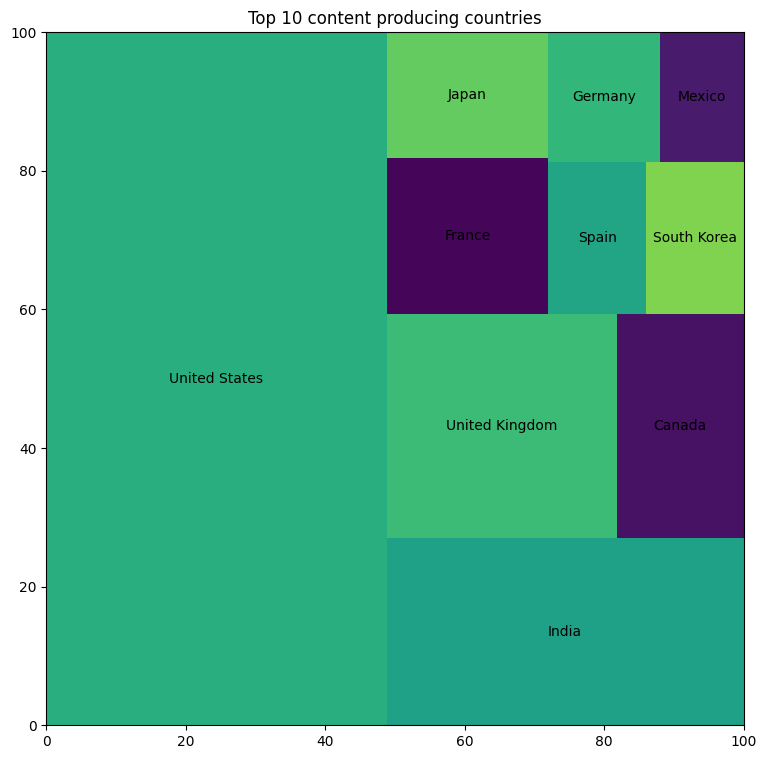

In [67]:
# Plot the top 10 countries
fig = plt.figure(figsize=(9,9))
t = nc_country[:10]
squarify.plot(sizes=t.values,label=t.index)
plt.title('Top 10 content producing countries')

plt.show()

<ipython-input-51-642bd23eddd5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-642bd23eddd5>:12: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



There are 20 types


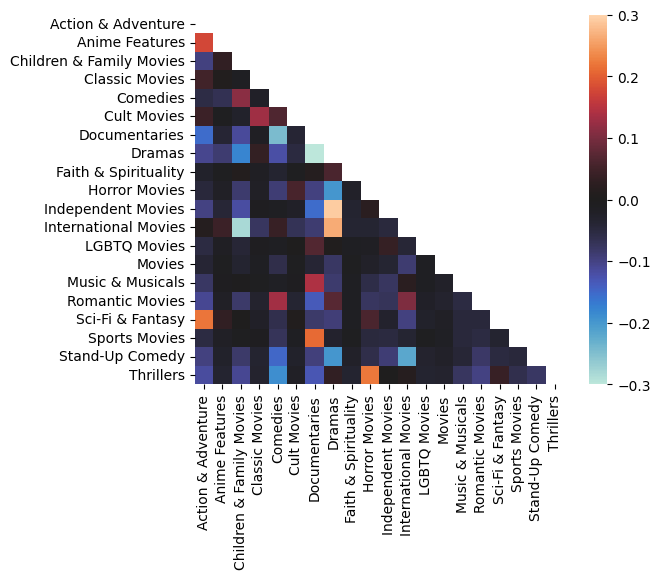

In [51]:
# Movies Genres
def g_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types".format(len(Types),title))
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots()

    pl = sns.heatmap(corr, mask=mask, vmax=.3, vmin=-.3, center=0, square=True)

    plt.show()
g_heatmap(n_movies, 'Movie')

<ipython-input-51-642bd23eddd5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-642bd23eddd5>:12: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



There are 22 types


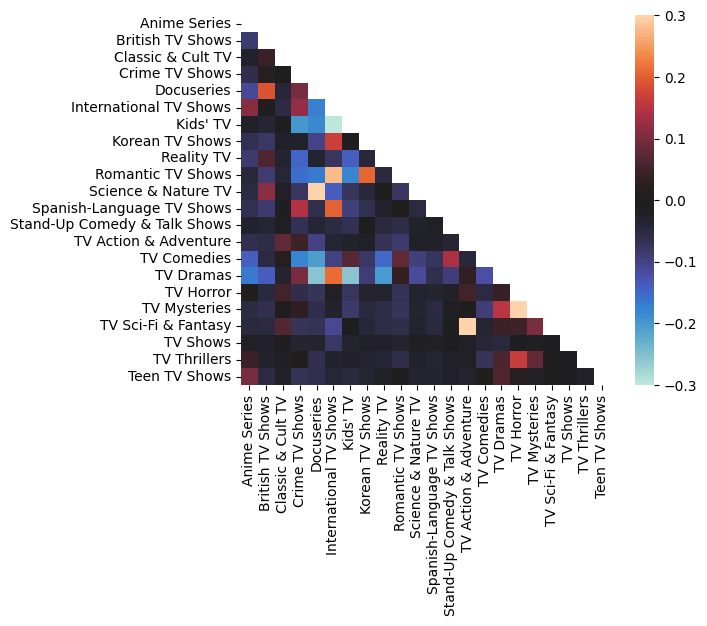

In [52]:
# Shows genres
g_heatmap(n_shows,'Shows')

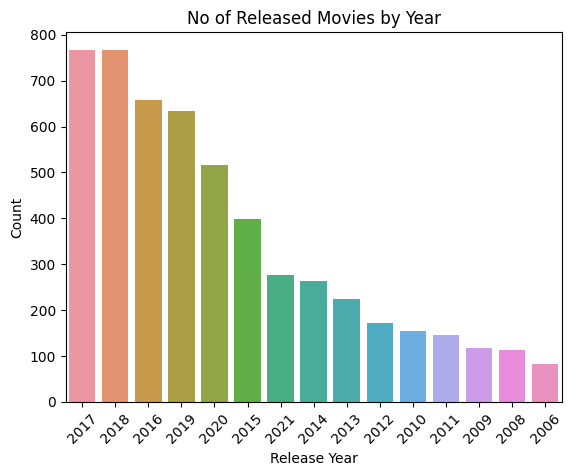

In [53]:
# Number of Released Movies by Year
sns.countplot(x='release_year',data=n_movies,order=n_movies['release_year'].value_counts().index[0:15])
plt.title('No of Released Movies by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

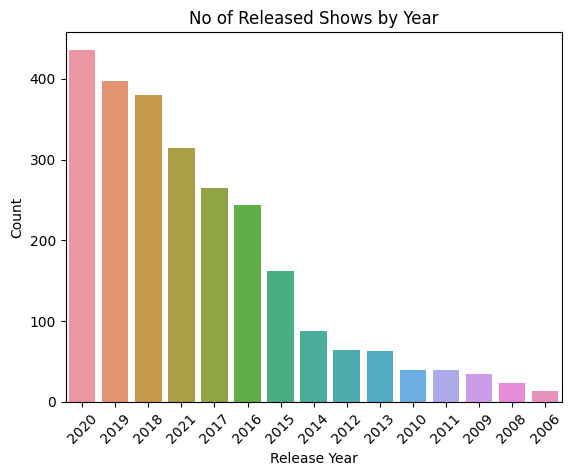

In [54]:
# Number of Released Shows by Year
sns.countplot(x='release_year',data=n_shows,order=n_shows['release_year'].value_counts().index[0:15])
plt.title('No of Released Shows by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()